Student : Arora, Sanjana (V00966221)

Question 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.datasets
from sklearn.decomposition import PCA  
from keras.datasets import fashion_mnist
import random
import seaborn as sns
random.seed(1337)

Same code as Q1 has been used for using the 45 dimensional data.

In [2]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
unique_label = np.unique(train_Y)

In [4]:
downsampled_data = np.zeros((0,28,28))
downsampled_data_Y = np.zeros(0)
for label in unique_label:
  data_filter = np.where(train_Y==label)[0]
  train_XX, train_YY = train_X[data_filter], train_Y[data_filter]
  downsampled_data = np.concatenate((downsampled_data, train_XX[:500,:,:]), axis=0)
  downsampled_data_Y = np.concatenate((downsampled_data_Y,train_YY[:500]), axis=0)

In [5]:
downsampled_reshapedata = np.reshape(downsampled_data, (downsampled_data.shape[0], 784)).astype("float32") / 255.

In [6]:
from sklearn.preprocessing import StandardScaler
processed_data = StandardScaler().fit_transform(downsampled_reshapedata)
print(processed_data.shape)

(5000, 784)


In [7]:
pca_varr = PCA(n_components=45)
pca_varr.fit(processed_data)
pca_varr_data = pca_varr.transform(processed_data)

In [8]:
X = pca_varr_data
y = downsampled_data_Y

In [9]:
def random_initialization(X, K):
  number_samples = X.shape[0]
  centers = X[np.random.randint(number_samples,size = K),:]
  return centers

In [10]:
def plus_plus(X, k):
    
    
    centers = [X[0]]
    
    for k in range(1, k):
      dist = np.array([])
      for x in X:
          dist = np.append(dist,np.min(np.sum(np.square(x-centers))))
        
      probs = dist/dist.sum()
      
      cumulative_probs = probs.cumsum()
      r = np.random.rand()
      
 
      for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
      centers = np.append(centers,[X[i]], axis = 0)

    return centers

In [105]:
def kmeans(X,K, init = "K-means"):

  # number of samples in training data
  n = X.shape[0]
  # number of features in the training data
  c = X.shape[1]

  if init == "random":
    # Random initilization of centers from random selection of data samples
    centers = random_initialization(X, K)
  else:
    #kmean++
    centers = plus_plus(X, K)
  
  # to store old centers
  centers_old = np.zeros(centers.shape) 
 
 # Store new centers
  centers_new = centers

  clusters = np.zeros(n)
  distances = np.zeros((n,K))

  error = np.sqrt(np.sum(np.square(centers_new - centers_old)))
  # When, after an update in the centers of the clusters, exit the loop if the center stays the same
  while error != 0:
    # Measuring the distance to every center of every cluster
      for i in range(K):
          distances[:,i] = np.sqrt(np.sum(np.square(X - centers_new[i]), axis=1))
    
    # Assigning all training data to closest center
      clusters = np.argmin(distances, axis = 1)
    
    
      centers_old = centers_new
    
    # Calculating mean for every cluster and update the center
      for i in range(K):
          centers_new[i] = np.mean(X[clusters == i], axis=0)
          
      error = np.sqrt(np.sum(np.square(centers_new - centers_old)))
      
      #calculating MSE of each data point from each of its center
      squared_error = 0
      for i in range(K):
        
        squared_error = squared_error + np.sum(np.square(X[clusters == i] - centers_new[i]))
          
          
          
  return centers_new, squared_error


In [106]:
 c, error = kmeans(X,2,"random")

**2.1 Lyod's Algorithm with random initialization**

In [117]:
k = np.arange(2,16)
error_list = []
for i in k:
  c, error = kmeans(X,i,"random")
  error_list.append(error)

In [118]:
error_list

[2718540.25,
 2517703.69921875,
 2222956.34375,
 1982034.890625,
 1916281.125,
 1940281.41015625,
 1838918.7578125,
 1699552.140625,
 1659512.6875,
 1744589.986328125,
 1681485.359375,
 1563768.8813476562,
 1483282.056640625,
 1494650.65234375]

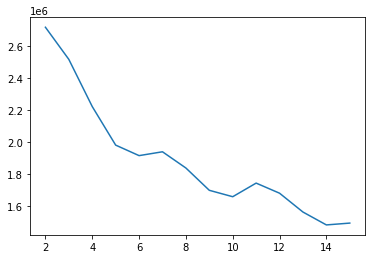

In [119]:
plt.plot(k,error_list)

According to the elbow method plot as illustrated above, 14 clusters have the least squared error from each point to its cluster center. So 14 clusters should be used for performing kmeans clustering with random initialization. 

However, the 14 clusters would not fit the true labels well as we know that essentially there are 10 different classes and 10 clusters would be the correct number of clusters for classifying the Fashion MNIST data correctly. Therefore, classes do not always entirely fall within a single cluster.

**2.1.2** **Exemplary plot for clusters = 10 using Kmeans ++**

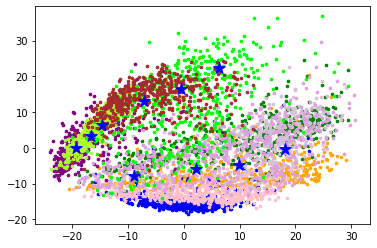

In [120]:
center, error = kmeans(X,10)

# Plot the data
colors=['orange', 'blue', 'green', 'pink', 'thistle', 'purple','plum','greenyellow','lime', 'brown']
i =0
for i in range(X.shape[0]):
      plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])
plt.scatter(center[:,0], center[:,1], marker='*', c='b', s=150)

In [17]:
error

536.18787

In [102]:
# the default setting of the k-means function is k-means initialization 
k = np.arange(2,16)
error_list = []
for i in k:
  c, error = kmeans(X,i)
  error_list.append(error)

In [103]:
error_list

[2917003.078125,
 2401811.625,
 2258830.1328125,
 2201113.85546875,
 2067672.7109375,
 1870604.6640625,
 1771109.79296875,
 1619128.60546875,
 1629793.44921875,
 1556314.5703125,
 1529820.8203125,
 1449607.5234375,
 1569584.04296875,
 1360911.7841796875]

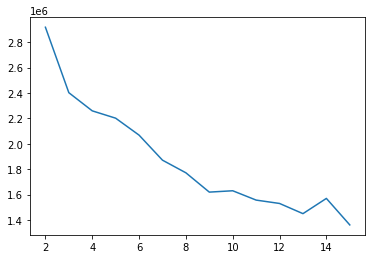

In [104]:
plt.plot(k,error_list)

As indicated above, 15 clusters provides the least squared error from each point to its cluster center. Therefore, 15 clusters should be used for performing kmeans clustering with kmeans++ initialization. However, as we know that given dataset is divided into 10 classes, 10 clusters should be used for correctly calssifying the data and hence, it can be said that the data clustered using kmeans clustering might not correspond to true labels accurately.

**2.2 Hierarchical AgglomerativeClustering**

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
agg = AgglomerativeClustering(n_clusters=15,affinity='euclidean',linkage='average')
agg.fit_predict(X)    
print(agg.labels_)                      

[0 0 0 ... 0 0 0]


In [23]:
agg_single = AgglomerativeClustering(n_clusters=15, affinity='euclidean',linkage='single')
agg_single.fit_predict(X)     

array([0, 0, 0, ..., 0, 0, 0])

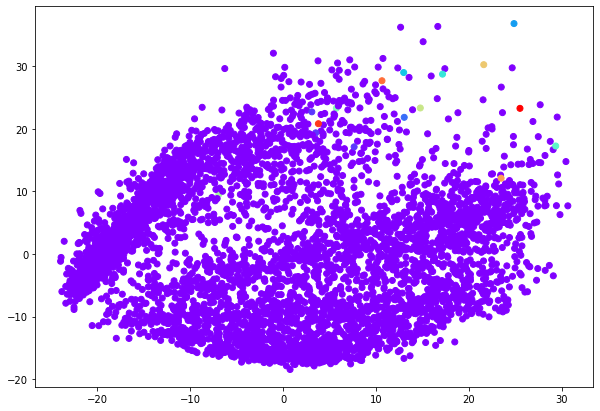

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=agg_single.labels_, cmap='rainbow')

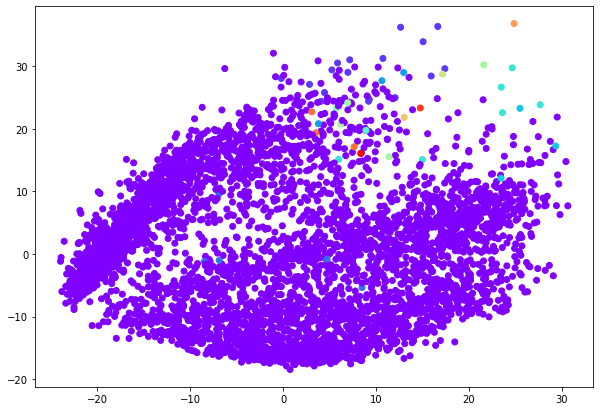

In [121]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap='rainbow')

In [123]:
import scipy.cluster.hierarchy as shc

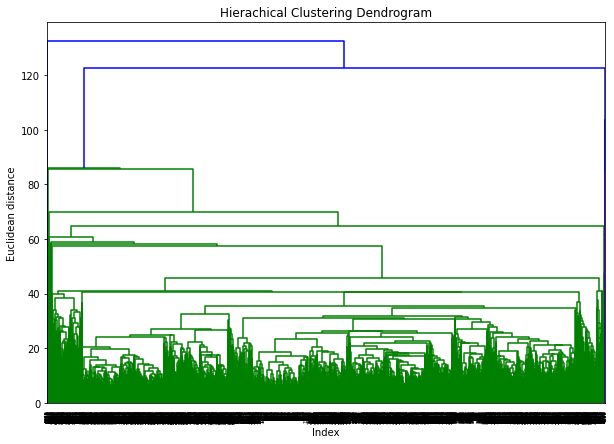

In [26]:
plt.figure(figsize=(10,7))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Euclidean distance")
dend = shc.dendrogram(shc.linkage(X, method='average'))

I have used 15 clusters for performing HAC with euclidean distance and have tried both the Average and Single linkage. The above plot illustrates the dendrogram generated from the same.

Sources referred : https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25

https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42